# Tsne from scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [ ]:
X = np.array([[1,2],
              [0,1],
              [5,6],
              [5,4]],dtype= np.float32)
Y =  np.array([1,3,-2,2],dtype=np.float32)

## Trí

In [ ]:
def sqr_euclidean_distance(a,b):
    if isinstance(a, int) or isinstance(a, np.int32) or isinstance(a, float) or isinstance(a, np.float32):
        return (a - b)**2
    return sum([(xi - xj )**2 for xi,xj in zip(a,b)])
            
sqr_euclidean_distance(np.array([0,-1,2]),np.array([2,1,3]))

def pairwise_distance(X, i):
    # return dist(X[j], X[i]) for all j
    return np.array([sqr_euclidean_distance(X[i], X[j]) for j in range(0, len(X))])


def conditional_pji(X, i, sigmaSqr): # ~softmax
    # compute p_j|i for all j
    D = pairwise_distance(X, i)
    exp_vector = np.zeros(len(X))
    for j in range(len(X)):
        if j!=i:
            exp_vector[j] = np.exp(-D[j]/(2*sigmaSqr))
    return exp_vector/np.sum(exp_vector)

def joint_pij(X, i, sigmaSqr):
    # compute pij = (p_i|j + p_j|i) / (2*N) for all j
    N = len(X)
    pi = np.zeros(N)
    for j in range(N):
        if j!=i:
            p_i_given_j = conditional_pji(X, i, sigmaSqr)[j]
            p_j_given_i = conditional_pji(X, j, sigmaSqr)[i]
            pi[j]= (p_i_given_j + p_j_given_i) / (2 * N) # N: nums of dimension
    return pi

def pairwise_distance_all(X):
    # 12 13,..., 23,..., 34,...
    pair = []
    for i in range(0,len(X)-1):
        for j in range(i+1, len(X)):
            pair.append(sqr_euclidean_distance(X[i], X[j]))
    return np.array(pair)

def t_dist(D): # t-distribution with D = dist^2
    return  1/(1+D)

def denom_qij(Y):
    D_all = pairwise_distance_all(Y)
    prob_vector= t_dist(D_all)
    return (2*np.sum(prob_vector)) # 2 because of repetition

def joint_qij(Y, i, denom):
    # compute qij for all j
    D = pairwise_distance(Y, i)
    t_vector = t_dist(D)
    t_vector[i] = 0 # qii = 0
    return t_vector/denom

In [ ]:
def plot(params, num_clusters): 
    colors = ['r','g','b','y','k']
    N = int(len(params)/num_clusters)
    for i in range(num_clusters):
        plt.scatter(params[N*i:N*(i+1)], params[N*i:N*(i+1)], c=colors[i % N])
    plt.show()
    
def gradient(X, Y, p, sigmaSqr = 3):
    N = len(X)
    grad = np.zeros(N)
    denom = denom_qij(Y) # <OVERLAPPED compute !!>
    for i in range(N):
        qi = joint_qij(Y, i, denom) # vector qi[0,1,...j]
        D = pairwise_distance(Y, i)
        t_vector = t_dist(D) # <OVERLAPPED compute !!>
        t_vector[i] = 0 #  qii = 0
        grad[i] = 4* np.sum((p[i] - qi)*(Y[i]-Y)*t_vector)
    return grad

def gradient_descent(X, Y, num_clusters, sigmaSqr = 3, num_iter=10, lr = 10): # Update params simultaneously
    N = len(X)
    params = Y
    p = [joint_pij(X, i, sigmaSqr) for i in range(N)] # vector pi[0,1,...j]
#     print(f'Iteration :{0}, params = \n{params}')
    plot(params, num_clusters)
    for i in range(num_iter):
        grad = gradient(X, params, p, sigmaSqr)
        params = params - lr*grad
        if i % 2 == 0:
          plot(params, num_clusters)
          # print(f'Iteration :{i+1}, params = \n{params}')
    return params

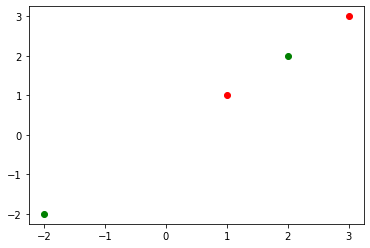

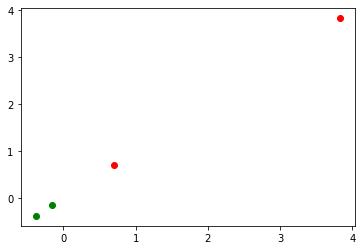

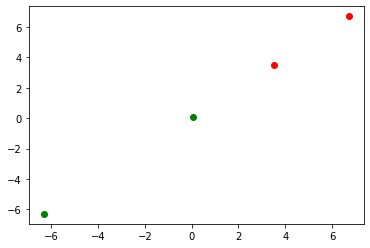

In [ ]:
params = gradient_descent(X, Y, num_clusters= 2,sigmaSqr=0.01, num_iter=3)

## More Datasets

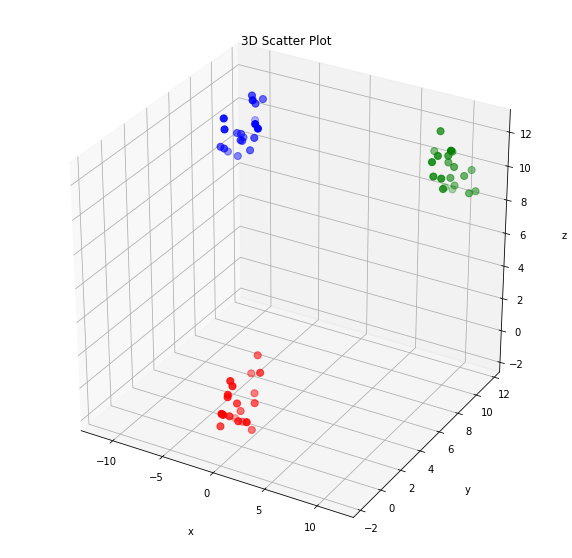

In [ ]:
N = 20
mean1 = [0, 0, 0]
mean2 = [10, 10, 10]
mean3 = [-10, 10, 10]
cov = [[1, 0, 0], [0, 1, 0], [0,0,1]]
X1 = np.random.multivariate_normal(mean1, cov, N)
X2 = np.random.multivariate_normal(mean2, cov, N)
X3 = np.random.multivariate_normal(mean3, cov, N)

# Plot the high-dimensional data
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(X1[:, 0],X1[:, 1],X1[:, 2], c = 'r', s = 50)
ax.scatter(X2[:, 0],X2[:, 1],X2[:, 2], c = 'g', s = 50)
ax.scatter(X3[:, 0],X3[:, 1],X3[:, 2], c = 'b', s = 50)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

X = np.vstack((X1,X2,X3)) 
Y = np.random.normal(0, 1e-4, size = 3*N) # Std should be small enough (=1e-4 in original paper)

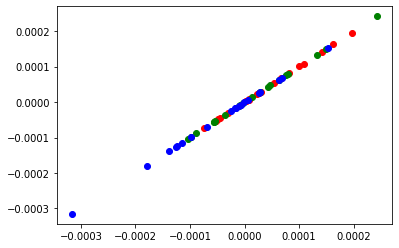

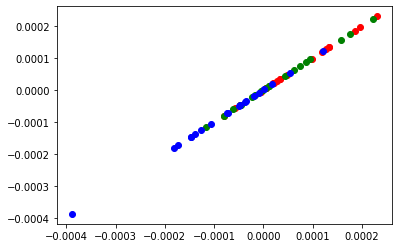

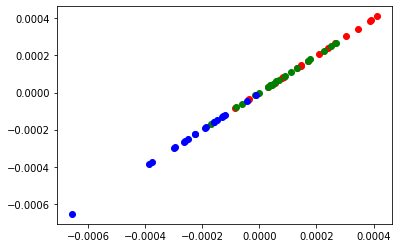

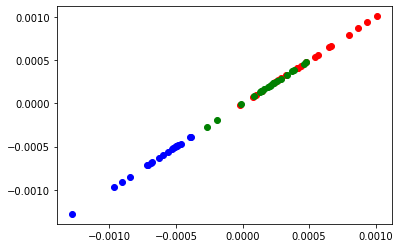

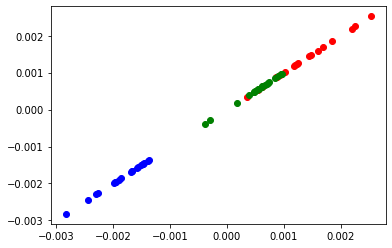

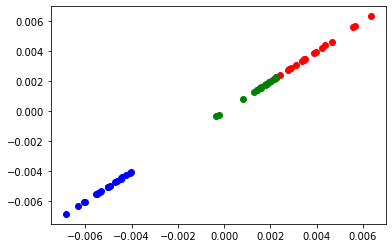

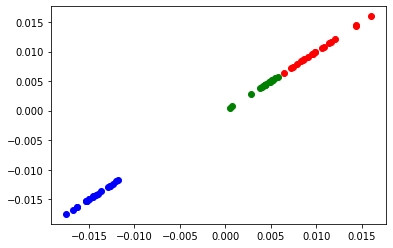

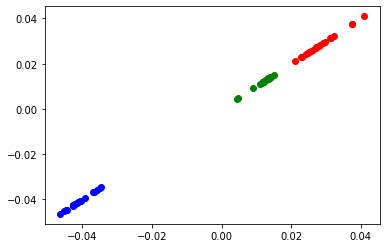

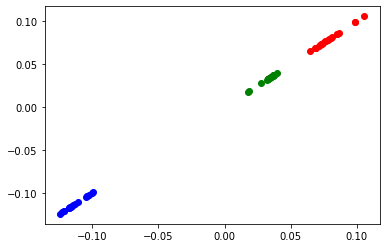

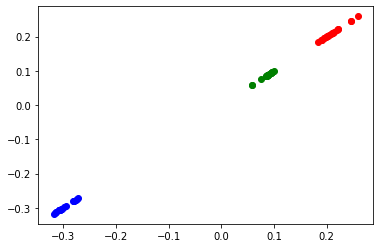

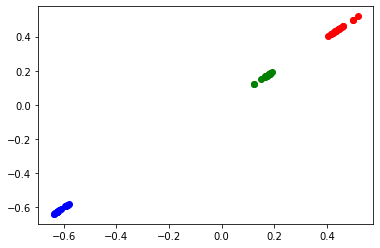

In [ ]:
params = gradient_descent(X,Y,num_clusters=3, sigmaSqr=1, num_iter=20)

## Hưng

In [ ]:
# Compute Euclidean distance
def sqr_euclidean_distance(a,b):
    if isinstance(a, int) or isinstance(a, np.int32) or isinstance(a, float) or isinstance(a, np.float32):
        return (a - b)**2
    return sum([(xi - xj )**2 for xi,xj in zip(a,b)])

######################################################################### Compute p ###############################################################################################

# Compute p
def pairwise_distance(X, i):
    # return dist(X[j], X[i]) for all j
    return np.array([sqr_euclidean_distance(X[i], X[j]) for j in range(0, len(X))])

# Compute p_j|i
def conditional_pji(X, i, sigmaSqr): # ~softmax
    # compute p_j|i for all j
    D = pairwise_distance(X, i)
    exp_vector = np.zeros(len(X))
    for j in range(len(X)):
        if j!=i:
            exp_vector[j] = np.exp(-D[j]/(2*sigmaSqr))
    return exp_vector/np.sum(exp_vector)

# Comput p_ji
def join_pij(X, a, b, sigmaSqr):
    # compute pij = (p_i|j + p_j|i) / (2*N) for i=a, j=b
    p_i_given_j = conditional_pji(X, a, sigmaSqr)[b]
    p_j_given_i = conditional_pji(X, b, sigmaSqr)[a]
    pij = (p_i_given_j + p_j_given_i) / (2*len(X)) # N: nums of dimension
    return pij

# Compute a list of all p_ij (repetition included)
def join_pij_full(X,sigmaSqr = 3):
  p = []
  for a in range(len(X)):
    for b in range(len(X)):
      if a!=b:
        p.append(join_pij(X, a, b, sigmaSqr))
  return p

######################################################################### Compute q ###############################################################################################

# Calculate denominator
def compute_qji_denominator(Y):
  denominator = 0
  for a in range(len(Y)):
    for b in range(len(Y)):
      if a != b:
        denominator += (1+sqr_euclidean_distance(Y[a],Y[b]))**-1
  return denominator       

# Compute a list of all q_ij (repetition included)
def join_qij_full(Y,denominator):
  q = []
  for a in range(len(Y)):
    for b in range(len(Y)):
      if a!= b:
        q.append(((1+sqr_euclidean_distance(Y[a],Y[b]))**-1)/denominator)
  return q

  ######################################################################### Gradient descent ###############################################################################################

  # Calculate gradient of 1 i
def gradient_i(X,Y,i,sigmaSqr,p,q):
  C = float(0)
  offset = 0
  for j in range(len(Y)):
      if j != i:
        position = i*(len(Y)-1)
        C += (p[position+offset]-q[position+offset])*(Y[i]-Y[j])*(1+sqr_euclidean_distance(Y[i],Y[j]))**-1
        offset += 1
  return 4*C

p = join_pij_full(X,sigmaSqr = 50)

# Calculate full gradient
def gradient_full(X,Y,sigmaSqr):
  n = len(X)
  gradient = []
  for i in range(n):
    gradient.append(gradient_i(X,Y,i,sigmaSqr,p,q = join_qij_full(Y,compute_qji_denominator(Y))))
  return np.array(gradient)

def gradient_desc(X,Y,sigmaSqr=50, num_iter=100,lr = 10):
  params = Y
  # print(f'Iteration :{0}, params = {params}')
  for i in range(num_iter):
      grad = gradient_full(X, params, sigmaSqr)
      params = params - grad*lr
      # print(f'Iteration :{i+1}, params = {params}')
  return params

  ######################################################################### Final Function ###############################################################################################

def t_sne(X,Y,sigmaSqr=3, num_iter=100 ,lr = 10):
    p = join_pij_full(X,sigmaSqr)
    return  gradient_desc(X,Y,sigmaSqr, num_iter,lr)

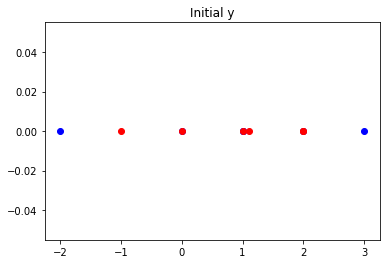

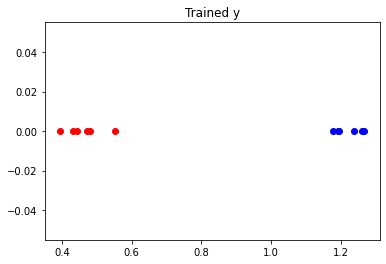

In [ ]:
######################################################################### Test case ###############################################################################################
# Data sample
X = np.array([[1,0],
              [0,1],
              [0,0],
              [0,0.1],
              [1,.2],
              [0.3,0.1], 
              [4.9,5],
              [5,5],
              [5,5.5],
              [5.5,4.9],
              [5,6],
              [5,4]],dtype= np.float32)
Y =  np.array([1,3,-2,2,0,1,-1,2,1.1,0,1,2],dtype=np.float32)

sigmaSqr=3
num_iter=100 
lr = 10

params = t_sne(X,Y,sigmaSqr,num_iter,lr)
def plot(params):
  N = int(len(params)/2)
  plt.scatter(params[:N], np.zeros(N), c='b')
  plt.scatter(params[N:], np.zeros(N), c='r')
  plt.show()

plt.title("Initial y")
plot(Y)
plt.title("Trained y")
plot(params)